# Log Transformations in Bayesian Statistics

**Building Intuition for Normal vs Log-Normal Distributions**

## Why Log Transformations?

Log transformations appear **everywhere** in Bayesian statistics:

1. **Enforcing positivity constraints** - Parameters like σ, rates, scales must be > 0
2. **Numerical stability** - Working in log space prevents underflow
3. **Multiplicative effects** - Log turns multiplication into addition
4. **Log-normal priors** - Natural for positive parameters with right skew

## What We'll Learn

1. **Log and exp basics** - Forward and inverse transformations
2. **Normal distribution** - Symmetric, unbounded
3. **Log-Normal distribution** - Positive only, right-skewed
4. **Relationship** - How they connect
5. **When to use each** - Practical guidance
6. **Bayesian applications** - Real modeling examples

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('default')
%matplotlib inline

# Set random seed
np.random.seed(42)

print('✓ Imports loaded')

✓ Imports loaded


---

## Part 1: Log and Exp Basics

### The Relationship

**Log** and **exp** are inverse operations:

$$\log(e^x) = x$$
$$e^{\log(x)} = x$$

### Key Properties

**Logarithm (log):**
- Maps positive numbers to all real numbers: (0, ∞) → (-∞, ∞)
- log(1) = 0
- log(x) < 0 when 0 < x < 1
- log(x) > 0 when x > 1
- **Cannot take log of negative numbers or zero!**

**Exponential (exp):**
- Maps all real numbers to positive numbers: (-∞, ∞) → (0, ∞)
- exp(0) = 1
- exp(x) < 1 when x < 0
- exp(x) > 1 when x > 0
- **Always positive!**

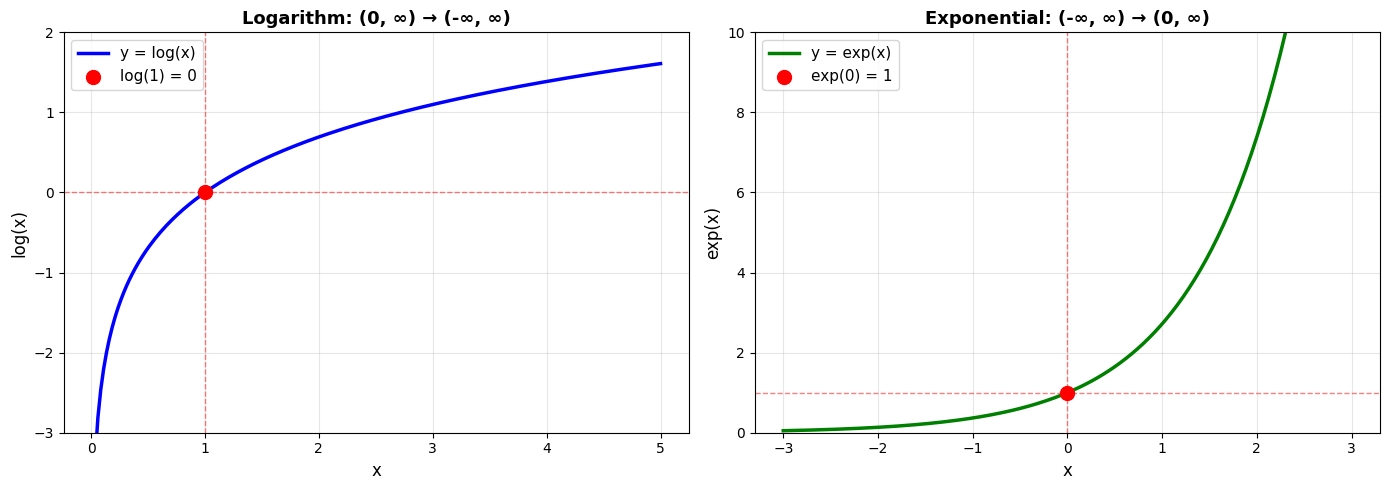

Key Observations:
• log(x): Only defined for x > 0, outputs any real number
• exp(x): Defined for any real x, always outputs positive numbers
• This is why we use exp to enforce positivity!


In [2]:
# Visualize log and exp functions
x_pos = np.linspace(0.01, 5, 200)  # For log (must be positive)
x_all = np.linspace(-3, 3, 200)    # For exp (can be any real number)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log function
ax = axes[0]
ax.plot(x_pos, np.log(x_pos), 'b-', linewidth=2.5, label='y = log(x)')
ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(1, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.scatter([1], [0], s=100, c='red', zorder=5, label='log(1) = 0')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('log(x)', fontsize=12)
ax.set_title('Logarithm: (0, ∞) → (-∞, ∞)', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(-3, 2)

# Exp function
ax = axes[1]
ax.plot(x_all, np.exp(x_all), 'g-', linewidth=2.5, label='y = exp(x)')
ax.axhline(1, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.scatter([0], [1], s=100, c='red', zorder=5, label='exp(0) = 1')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('exp(x)', fontsize=12)
ax.set_title('Exponential: (-∞, ∞) → (0, ∞)', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()

print("Key Observations:")
print("• log(x): Only defined for x > 0, outputs any real number")
print("• exp(x): Defined for any real x, always outputs positive numbers")
print("• This is why we use exp to enforce positivity!")

In [3]:
# Numerical examples
print("Log Transformation Examples:")
print("="*50)
values = [0.1, 0.5, 1, 2, 5, 10, 100]
for x in values:
    log_x = np.log(x)
    back = np.exp(log_x)
    print(f"x = {x:6.1f}  →  log(x) = {log_x:6.2f}  →  exp(log(x)) = {back:6.1f} ✓")

print("\n" + "="*50)
print("\nExp Transformation Examples:")
print("="*50)
values = [-3, -1, 0, 1, 2, 3]
for x in values:
    exp_x = np.exp(x)
    back = np.log(exp_x)
    print(f"x = {x:3d}  →  exp(x) = {exp_x:7.2f}  →  log(exp(x)) = {back:3.0f} ✓")

print("\n" + "="*50)
print("Key: log and exp are inverse operations!")

Log Transformation Examples:
x =    0.1  →  log(x) =  -2.30  →  exp(log(x)) =    0.1 ✓
x =    0.5  →  log(x) =  -0.69  →  exp(log(x)) =    0.5 ✓
x =    1.0  →  log(x) =   0.00  →  exp(log(x)) =    1.0 ✓
x =    2.0  →  log(x) =   0.69  →  exp(log(x)) =    2.0 ✓
x =    5.0  →  log(x) =   1.61  →  exp(log(x)) =    5.0 ✓
x =   10.0  →  log(x) =   2.30  →  exp(log(x)) =   10.0 ✓
x =  100.0  →  log(x) =   4.61  →  exp(log(x)) =  100.0 ✓


Exp Transformation Examples:
x =  -3  →  exp(x) =    0.05  →  log(exp(x)) =  -3 ✓
x =  -1  →  exp(x) =    0.37  →  log(exp(x)) =  -1 ✓
x =   0  →  exp(x) =    1.00  →  log(exp(x)) =   0 ✓
x =   1  →  exp(x) =    2.72  →  log(exp(x)) =   1 ✓
x =   2  →  exp(x) =    7.39  →  log(exp(x)) =   2 ✓
x =   3  →  exp(x) =   20.09  →  log(exp(x)) =   3 ✓

Key: log and exp are inverse operations!


---

## Part 2: Normal Distribution

### Definition

$$X \sim \text{Normal}(\mu, \sigma^2)$$

**Properties:**
- **Support**: (-∞, ∞) - can be any real number
- **Shape**: Symmetric bell curve
- **Parameters**: 
  - μ = mean (location)
  - σ = standard deviation (scale)

**When to use:**
- Variables that can be positive or negative
- Errors/residuals
- Parameters with no natural bounds

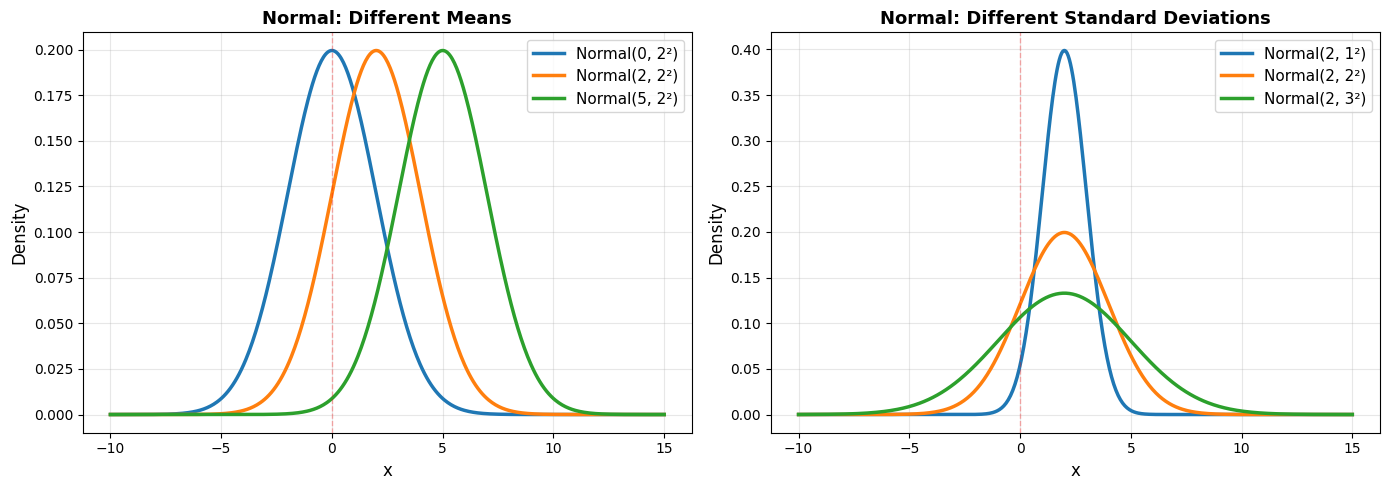

Normal Distribution:
• Symmetric around mean
• Can be negative!
• Good for: errors, centered parameters, differences


In [4]:
# Visualize Normal distributions
x = np.linspace(-10, 15, 500)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Different means, same sd
ax = axes[0]
for mu in [0, 2, 5]:
    pdf = stats.norm.pdf(x, loc=mu, scale=2)
    ax.plot(x, pdf, linewidth=2.5, label=f'Normal({mu}, 2²)')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Normal: Different Means', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)

# Same mean, different sd
ax = axes[1]
for sigma in [1, 2, 3]:
    pdf = stats.norm.pdf(x, loc=2, scale=sigma)
    ax.plot(x, pdf, linewidth=2.5, label=f'Normal(2, {sigma}²)')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Normal: Different Standard Deviations', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)

plt.tight_layout()
plt.show()

print("Normal Distribution:")
print("• Symmetric around mean")
print("• Can be negative!")
print("• Good for: errors, centered parameters, differences")

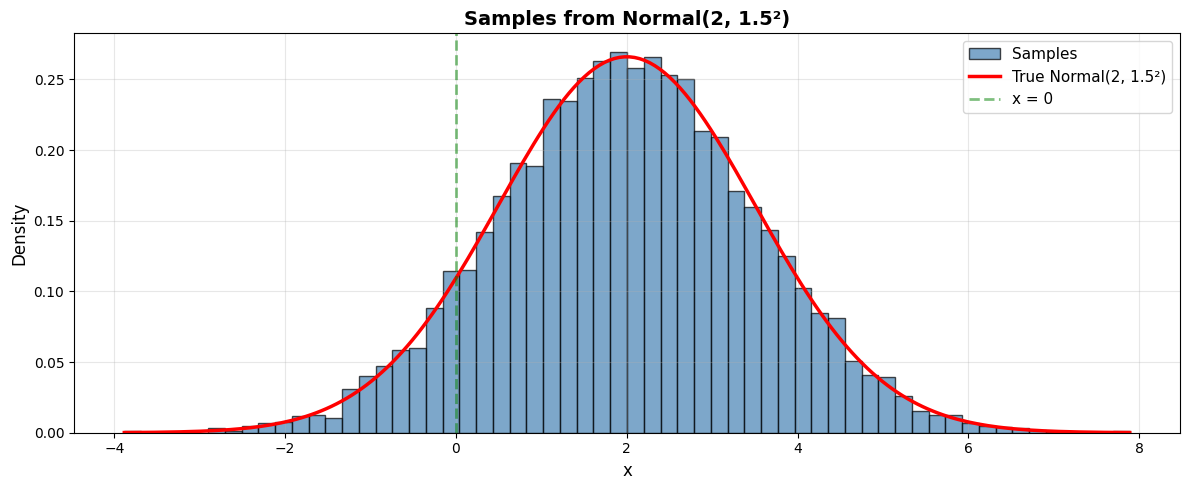

Statistics:
  Mean: 2.00
  Std: 1.51
  Min: -3.88
  Max: 7.89
  % Negative: 9.3%

⚠️ Normal can produce NEGATIVE values!


In [5]:
# Sample from Normal
samples_normal = np.random.normal(loc=2, scale=1.5, size=10000)

plt.figure(figsize=(12, 5))
plt.hist(samples_normal, bins=60, density=True, alpha=0.7, 
         color='steelblue', edgecolor='black', label='Samples')

x_range = np.linspace(samples_normal.min(), samples_normal.max(), 200)
plt.plot(x_range, stats.norm.pdf(x_range, 2, 1.5), 'r-', 
         linewidth=2.5, label='True Normal(2, 1.5²)')

plt.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='x = 0')
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Samples from Normal(2, 1.5²)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

negative_pct = (samples_normal < 0).mean() * 100
print(f"Statistics:")
print(f"  Mean: {samples_normal.mean():.2f}")
print(f"  Std: {samples_normal.std():.2f}")
print(f"  Min: {samples_normal.min():.2f}")
print(f"  Max: {samples_normal.max():.2f}")
print(f"  % Negative: {negative_pct:.1f}%")
print("\n⚠️ Normal can produce NEGATIVE values!")

---

## Part 3: Log-Normal Distribution

### Definition

If $Y \sim \text{Normal}(\mu, \sigma^2)$, then:

$$X = e^Y \sim \text{Log-Normal}(\mu, \sigma^2)$$

**Equivalently:** If $X \sim \text{Log-Normal}(\mu, \sigma^2)$, then:

$$\log(X) \sim \text{Normal}(\mu, \sigma^2)$$

### Properties

- **Support**: (0, ∞) - ALWAYS POSITIVE!
- **Shape**: Right-skewed (long right tail)
- **Parameters**: 
  - μ = mean of log(X)
  - σ = std dev of log(X)
  - **NOT** the mean and std of X itself!

### When to use

- Variables that MUST be positive
- Multiplicative processes
- Priors for: σ, rates, scales, positive slopes
- When you expect right skew

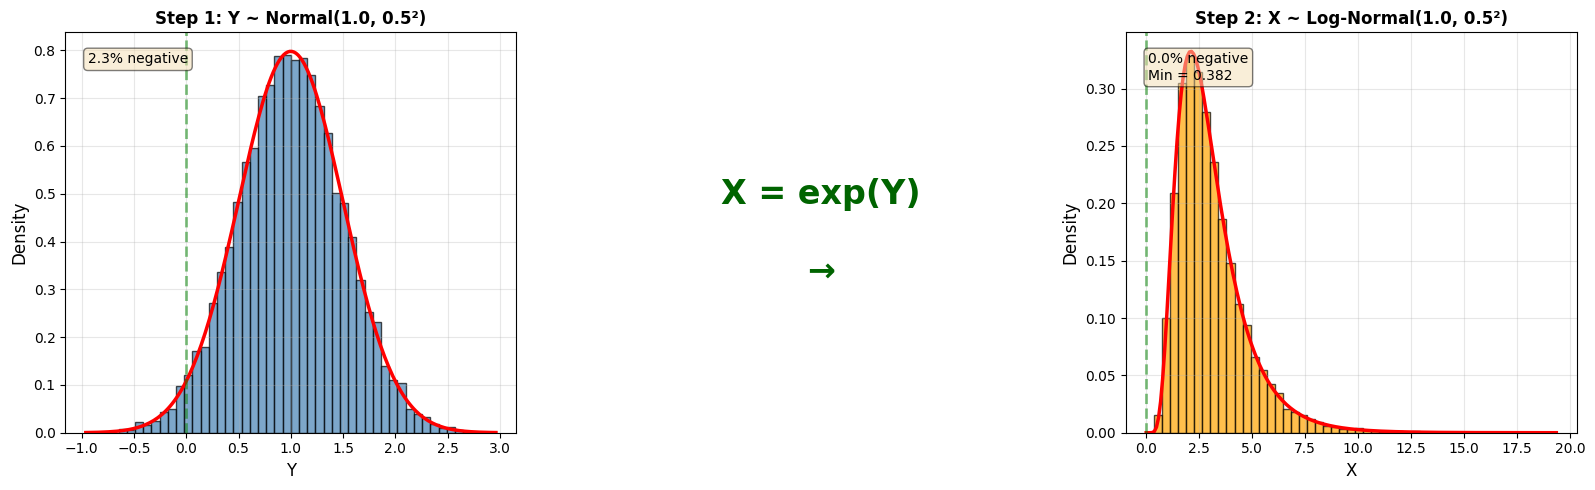

The Transformation:
Y ~ Normal(1.0, 0.5²):
  Mean(Y) = 0.999
  Std(Y) = 0.502
  Min(Y) = -0.961 (can be negative!)

X = exp(Y) ~ Log-Normal(1.0, 0.5²):
  Mean(X) = 3.080
  Std(X) = 1.652
  Min(X) = 0.382 (always positive!)

✓ Exponentiation enforces positivity!


In [6]:
# Generate Log-Normal by transforming Normal
np.random.seed(42)

# Step 1: Sample from Normal
mu_log = 1.0
sigma_log = 0.5
Y = np.random.normal(mu_log, sigma_log, size=10000)

# Step 2: Exponentiate to get Log-Normal
X = np.exp(Y)

# Visualize the transformation
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Original Normal
ax = axes[0]
ax.hist(Y, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
y_range = np.linspace(Y.min(), Y.max(), 200)
ax.plot(y_range, stats.norm.pdf(y_range, mu_log, sigma_log), 'r-', linewidth=2.5)
ax.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xlabel('Y', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Step 1: Y ~ Normal({mu_log}, {sigma_log}²)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'{(Y<0).sum()/len(Y)*100:.1f}% negative', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Arrow
ax = axes[1]
ax.text(0.5, 0.5, 'X = exp(Y)\n\n→', fontsize=24, ha='center', va='center',
        fontweight='bold', color='darkgreen')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Resulting Log-Normal
ax = axes[2]
ax.hist(X, bins=50, density=True, alpha=0.7, color='orange', edgecolor='black')
x_range = np.linspace(0.01, X.max(), 200)
ax.plot(x_range, stats.lognorm.pdf(x_range, s=sigma_log, scale=np.exp(mu_log)), 
        'r-', linewidth=2.5)
ax.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Step 2: X ~ Log-Normal({mu_log}, {sigma_log}²)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'{(X<0).sum()/len(X)*100:.1f}% negative\nMin = {X.min():.3f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("The Transformation:")
print("="*60)
print(f"Y ~ Normal({mu_log}, {sigma_log}²):")
print(f"  Mean(Y) = {Y.mean():.3f}")
print(f"  Std(Y) = {Y.std():.3f}")
print(f"  Min(Y) = {Y.min():.3f} (can be negative!)")
print(f"\nX = exp(Y) ~ Log-Normal({mu_log}, {sigma_log}²):")
print(f"  Mean(X) = {X.mean():.3f}")
print(f"  Std(X) = {X.std():.3f}")
print(f"  Min(X) = {X.min():.3f} (always positive!)")
print(f"\n✓ Exponentiation enforces positivity!")

### Important: Parameters Mean Different Things!

**For Log-Normal(μ, σ²):**
- μ and σ are parameters of **log(X)**, not X itself
- Mean of X ≠ μ
- Std of X ≠ σ

**Actual mean and variance of X:**

$$E[X] = e^{\mu + \sigma^2/2}$$
$$\text{Var}[X] = (e^{\sigma^2} - 1) \cdot e^{2\mu + \sigma^2}$$

In [7]:
# Demonstrate parameter meanings
mu_log = 1.0
sigma_log = 0.5

# Theoretical mean and variance of Log-Normal
theoretical_mean = np.exp(mu_log + sigma_log**2 / 2)
theoretical_var = (np.exp(sigma_log**2) - 1) * np.exp(2*mu_log + sigma_log**2)
theoretical_std = np.sqrt(theoretical_var)

# Generate samples
X = np.random.lognormal(mean=mu_log, sigma=sigma_log, size=100000)

print("Log-Normal Distribution Parameters:")
print("="*60)
print(f"Parameters: μ = {mu_log}, σ = {sigma_log}")
print(f"  (These are for log(X), not X!)\n")

print("Mean of log(X):")
print(f"  Theoretical: {mu_log:.3f}")
print(f"  Simulated:   {np.log(X).mean():.3f} ✓\n")

print("Std of log(X):")
print(f"  Theoretical: {sigma_log:.3f}")
print(f"  Simulated:   {np.log(X).std():.3f} ✓\n")

print("Mean of X (NOT μ!):")
print(f"  Theoretical: {theoretical_mean:.3f}")
print(f"  Simulated:   {X.mean():.3f} ✓\n")

print("Std of X (NOT σ!):")
print(f"  Theoretical: {theoretical_std:.3f}")
print(f"  Simulated:   {X.std():.3f} ✓")

print("\n" + "="*60)
print("Key: μ and σ describe log(X), not X itself!")

Log-Normal Distribution Parameters:
Parameters: μ = 1.0, σ = 0.5
  (These are for log(X), not X!)

Mean of log(X):
  Theoretical: 1.000
  Simulated:   1.001 ✓

Std of log(X):
  Theoretical: 0.500
  Simulated:   0.500 ✓

Mean of X (NOT μ!):
  Theoretical: 3.080
  Simulated:   3.084 ✓

Std of X (NOT σ!):
  Theoretical: 1.642
  Simulated:   1.640 ✓

Key: μ and σ describe log(X), not X itself!


---

## Part 4: Comparing Normal vs Log-Normal

Let's visualize different Log-Normal distributions and compare with Normal.

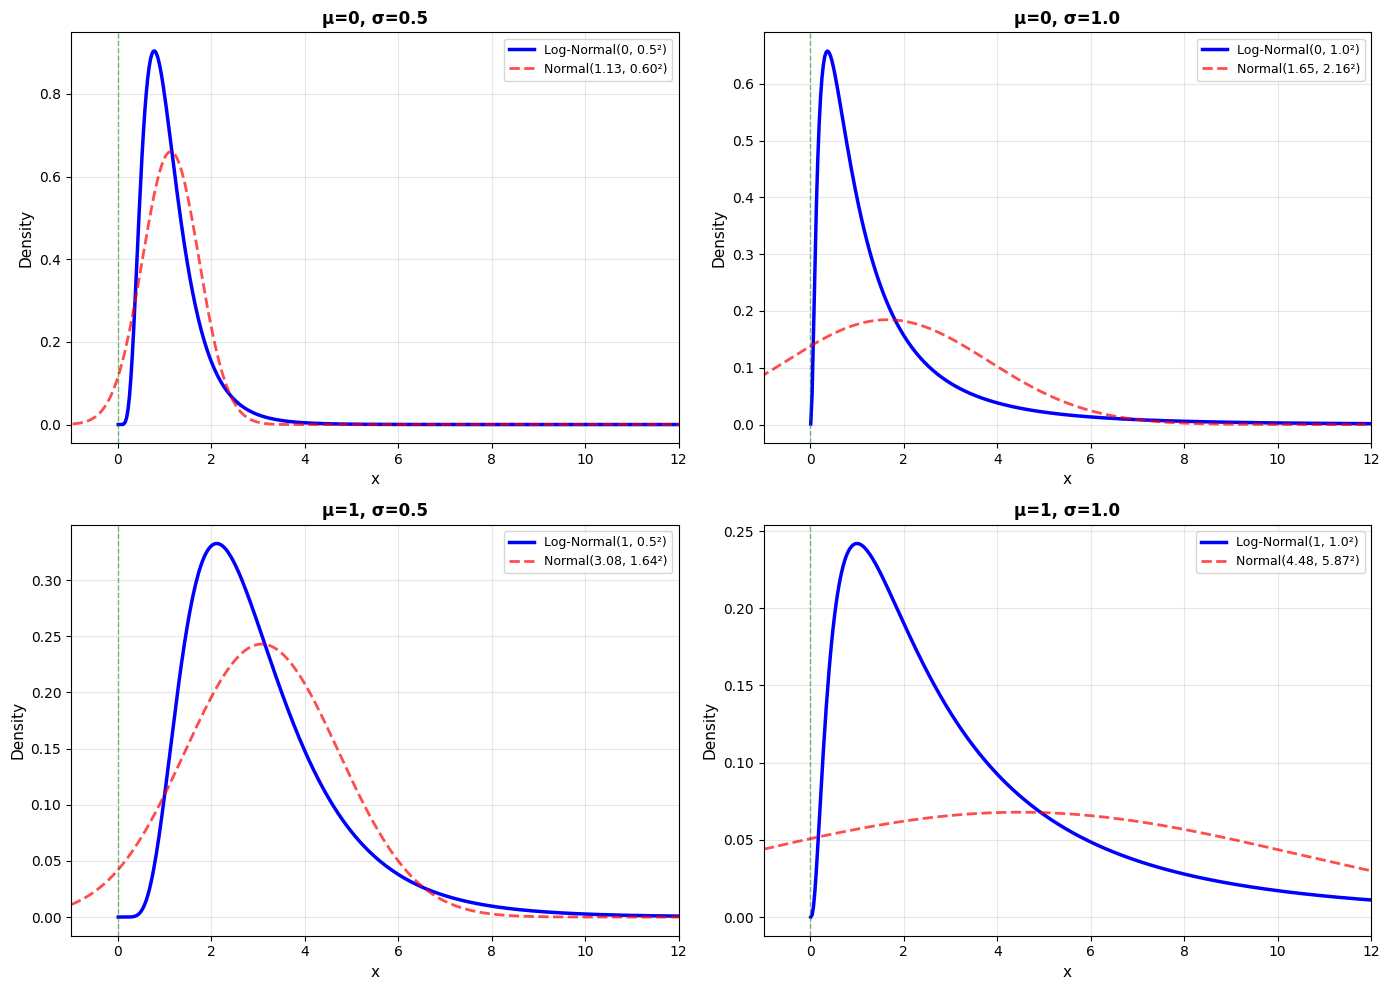

Key Differences:
• Log-Normal: Always > 0, right-skewed
• Normal: Can be negative, symmetric
• Larger σ → More skew in Log-Normal
• Larger μ → Shifts Log-Normal to the right


In [8]:
# Compare different Log-Normal distributions
x_ln = np.linspace(0.01, 15, 500)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

params = [(0, 0.5), (0, 1.0), (1, 0.5), (1, 1.0)]

for idx, (mu, sigma) in enumerate(params):
    ax = axes[idx]
    
    # Log-Normal
    lognorm_pdf = stats.lognorm.pdf(x_ln, s=sigma, scale=np.exp(mu))
    ax.plot(x_ln, lognorm_pdf, 'b-', linewidth=2.5, label=f'Log-Normal({mu}, {sigma}²)')
    
    # Compare with Normal having same mean
    lognorm_mean = np.exp(mu + sigma**2/2)
    lognorm_var = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    lognorm_std = np.sqrt(lognorm_var)
    
    x_norm = np.linspace(-5, 15, 500)
    norm_pdf = stats.norm.pdf(x_norm, loc=lognorm_mean, scale=lognorm_std)
    ax.plot(x_norm, norm_pdf, 'r--', linewidth=2, alpha=0.7, 
            label=f'Normal({lognorm_mean:.2f}, {lognorm_std:.2f}²)')
    
    ax.axvline(0, color='green', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'μ={mu}, σ={sigma}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 12)

plt.tight_layout()
plt.show()

print("Key Differences:")
print("• Log-Normal: Always > 0, right-skewed")
print("• Normal: Can be negative, symmetric")
print("• Larger σ → More skew in Log-Normal")
print("• Larger μ → Shifts Log-Normal to the right")

---

## Part 5: When to Use Each Distribution

### Decision Tree

**Can the parameter be negative?**

- **YES** → Use **Normal**
  - Examples: errors, differences, coefficients that can be negative
  - Model: θ ~ Normal(μ, σ²)

- **NO** (must be positive) → Use **Log-Normal** or log-transform
  - Examples: σ, rates, positive slopes, scales
  - Model: log(θ) ~ Normal(μ, σ²) or θ ~ Log-Normal(μ, σ²)

### Common Bayesian Applications

| Parameter | Constraint | Distribution |
|-----------|------------|---------------|
| α (intercept) | Can be negative | Normal |
| β (slope) | Can be negative | Normal |
| β (positive slope) | Must be > 0 | Log-Normal |
| σ (std dev) | Must be > 0 | Log-Normal |
| λ (rate) | Must be > 0 | Log-Normal |
| Scale parameters | Must be > 0 | Log-Normal |

---

## Part 6: Practical Example - Modeling Positive Parameters

### Scenario: Prior for Standard Deviation σ

**Problem:** We need a prior for σ in our height model:
```
height ~ Normal(μ, σ)
```

**Constraint:** σ > 0 (standard deviation must be positive)

**Two approaches:**

1. **Direct Log-Normal prior:**
   ```
   σ ~ Log-Normal(log(10), 1)
   ```

2. **Log-transform approach:**
   ```
   log(σ) ~ Normal(log(10), 1)
   σ = exp(log(σ))
   ```

These are **equivalent**!

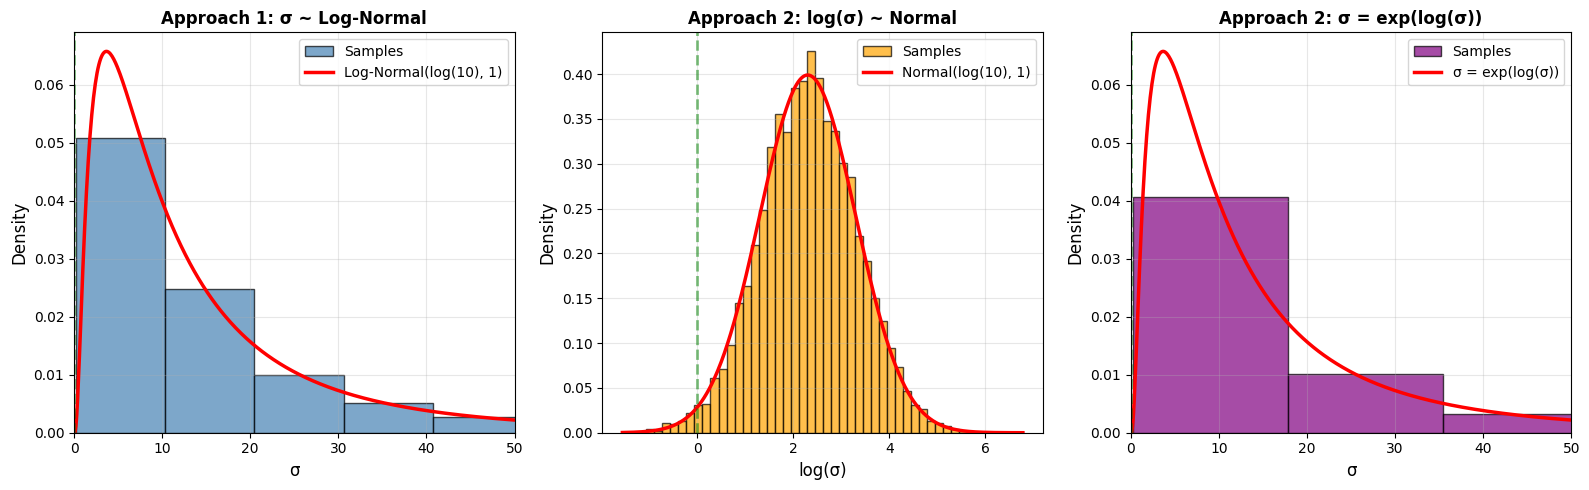

Comparison:
Approach 1 (direct Log-Normal):
  Mean: 16.53
  Std: 21.92
  Min: 0.20

Approach 2 (transform Normal):
  Mean: 16.76
  Std: 23.13
  Min: 0.21

✓ Both approaches give identical results!
✓ Both guarantee σ > 0


In [9]:
# Approach 1: Direct Log-Normal
np.random.seed(42)
sigma_samples_1 = np.random.lognormal(mean=np.log(10), sigma=1, size=10000)

# Approach 2: Transform Normal
log_sigma_samples = np.random.normal(loc=np.log(10), scale=1, size=10000)
sigma_samples_2 = np.exp(log_sigma_samples)

# Compare
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Approach 1
ax = axes[0]
ax.hist(sigma_samples_1, bins=50, density=True, alpha=0.7, 
        color='steelblue', edgecolor='black', label='Samples')
x_range = np.linspace(0.01, 50, 500)
ax.plot(x_range, stats.lognorm.pdf(x_range, s=1, scale=10), 
        'r-', linewidth=2.5, label='Log-Normal(log(10), 1)')
ax.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xlabel('σ', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Approach 1: σ ~ Log-Normal', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 50)

# Approach 2 - Step 1
ax = axes[1]
ax.hist(log_sigma_samples, bins=50, density=True, alpha=0.7, 
        color='orange', edgecolor='black', label='Samples')
x_range_log = np.linspace(log_sigma_samples.min(), log_sigma_samples.max(), 500)
ax.plot(x_range_log, stats.norm.pdf(x_range_log, np.log(10), 1), 
        'r-', linewidth=2.5, label='Normal(log(10), 1)')
ax.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xlabel('log(σ)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Approach 2: log(σ) ~ Normal', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Approach 2 - Step 2
ax = axes[2]
ax.hist(sigma_samples_2, bins=50, density=True, alpha=0.7, 
        color='purple', edgecolor='black', label='Samples')
ax.plot(x_range, stats.lognorm.pdf(x_range, s=1, scale=10), 
        'r-', linewidth=2.5, label='σ = exp(log(σ))')
ax.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xlabel('σ', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Approach 2: σ = exp(log(σ))', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 50)

plt.tight_layout()
plt.show()

print("Comparison:")
print("="*60)
print(f"Approach 1 (direct Log-Normal):")
print(f"  Mean: {sigma_samples_1.mean():.2f}")
print(f"  Std: {sigma_samples_1.std():.2f}")
print(f"  Min: {sigma_samples_1.min():.2f}")

print(f"\nApproach 2 (transform Normal):")
print(f"  Mean: {sigma_samples_2.mean():.2f}")
print(f"  Std: {sigma_samples_2.std():.2f}")
print(f"  Min: {sigma_samples_2.min():.2f}")

print("\n" + "="*60)
print("✓ Both approaches give identical results!")
print("✓ Both guarantee σ > 0")

---

## Part 7: Why We Use Log-Transform in Code

### Recall from `univariate_gaussian.ipynb`

```python
def neg_log_posterior(params):
    mu = params[0]
    log_sigma = params[1]  # ← Optimize over log(σ)
    sigma = np.exp(log_sigma)  # ← Transform back
    
    # Use sigma in likelihood
    log_lik = np.sum(stats.norm.logpdf(height, mu, sigma))
    
    # Prior on log(σ) (equivalent to Log-Normal prior on σ)
    log_prior_log_sigma = stats.norm.logpdf(log_sigma, np.log(10), 1)
    
    # Jacobian correction
    jacobian = log_sigma
    
    return -(log_lik + log_prior + jacobian)
```

### Why This Approach?

1. **Unconstrained optimization**: log(σ) ∈ (-∞, ∞)
2. **Automatic positivity**: σ = exp(log(σ)) > 0 always
3. **Equivalent to Log-Normal prior**: Prior on log(σ) = Log-Normal prior on σ
4. **Numerical stability**: Avoids very small or very large σ values

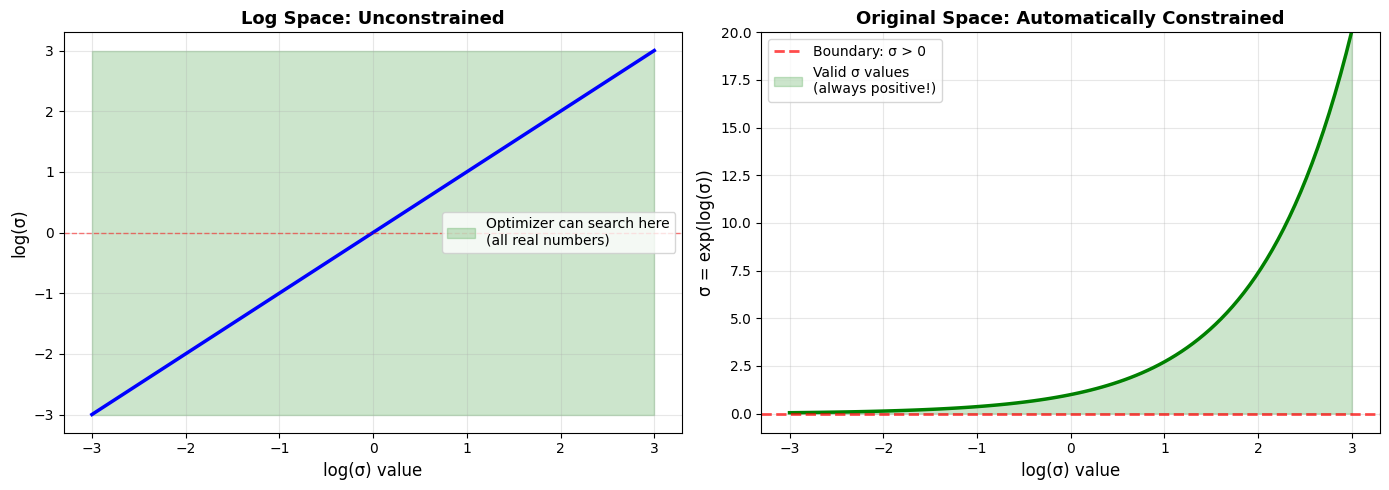

The Magic of Log-Transform:
• Optimizer searches over log(σ): any real number
• Automatically enforces σ > 0 via exp transform
• No need to constrain the optimizer!
• This is why we use it in `neg_log_posterior`


In [10]:
# Demonstrate unconstrained optimization
log_sigma_values = np.linspace(-3, 3, 100)
sigma_values = np.exp(log_sigma_values)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log space
ax = axes[0]
ax.plot(log_sigma_values, log_sigma_values, 'b-', linewidth=2.5)
ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(log_sigma_values, -3, 3, alpha=0.2, color='green', 
                label='Optimizer can search here\n(all real numbers)')
ax.set_xlabel('log(σ) value', fontsize=12)
ax.set_ylabel('log(σ)', fontsize=12)
ax.set_title('Log Space: Unconstrained', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Original space
ax = axes[1]
ax.plot(log_sigma_values, sigma_values, 'g-', linewidth=2.5)
ax.axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, 
          label='Boundary: σ > 0')
ax.fill_between(log_sigma_values, 0, sigma_values, alpha=0.2, color='green',
               label='Valid σ values\n(always positive!)')
ax.set_xlabel('log(σ) value', fontsize=12)
ax.set_ylabel('σ = exp(log(σ))', fontsize=12)
ax.set_title('Original Space: Automatically Constrained', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(-1, 20)

plt.tight_layout()
plt.show()

print("The Magic of Log-Transform:")
print("="*60)
print("• Optimizer searches over log(σ): any real number")
print("• Automatically enforces σ > 0 via exp transform")
print("• No need to constrain the optimizer!")
print("• This is why we use it in `neg_log_posterior`")

---

## Summary

### Key Concepts

**1. Log and Exp are Inverses**
- log: (0, ∞) → (-∞, ∞)
- exp: (-∞, ∞) → (0, ∞)
- Use exp to enforce positivity!

**2. Normal Distribution**
- Support: (-∞, ∞)
- Symmetric, bell-shaped
- Use for: parameters that can be negative

**3. Log-Normal Distribution**
- If log(X) ~ Normal(μ, σ²), then X ~ Log-Normal(μ, σ²)
- Support: (0, ∞) - always positive!
- Right-skewed
- Use for: parameters that must be positive

**4. Bayesian Applications**

| Scenario | Approach | Code |
|----------|----------|------|
| σ must be positive | Log-transform | `log_sigma` in params, `sigma = exp(log_sigma)` |
| Log-Normal prior | Normal on log | `log_prior = norm.logpdf(log_sigma, ...)` |
| Unconstrained optimization | Work in log space | Optimizer searches log(σ), not σ |

### When to Use What

**Normal Prior:**
```python
# For parameters that can be negative
alpha ~ Normal(0, 10)
beta ~ Normal(0, 5)
```

**Log-Normal Prior (via transform):**
```python
# For positive parameters
log(sigma) ~ Normal(log(10), 1)
sigma = exp(log(sigma))  # Always > 0

# Equivalent to:
sigma ~ Log-Normal(log(10), 1)
```

### The Bottom Line

**Log transformations in Bayesian stats:**
1. ✓ Enforce positivity constraints elegantly
2. ✓ Enable unconstrained optimization
3. ✓ Provide numerical stability
4. ✓ Equivalent to Log-Normal priors
5. ✓ This is why you see them EVERYWHERE!

---

**Now you understand why we use `log_sigma` and `exp(log_sigma)` in our models!**